In [1]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

from composition.analysis import load_sim
import composition.analysis.plotting_functions as plotting
import composition.analysis.data_functions as data_functions

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sns.set_palette('muted')
sns.set_color_codes()

/home/jbourbeau/composition/analysis/load_sim.py:67: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
/home/jbourbeau/composition/analysis/load_sim.py:68: RuntimeWarning: invalid value encountered in log10
  df['InIce_log_charge'] = np.nan_to_num(np.log10(df['InIce_charge']))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


(0, 1.1)

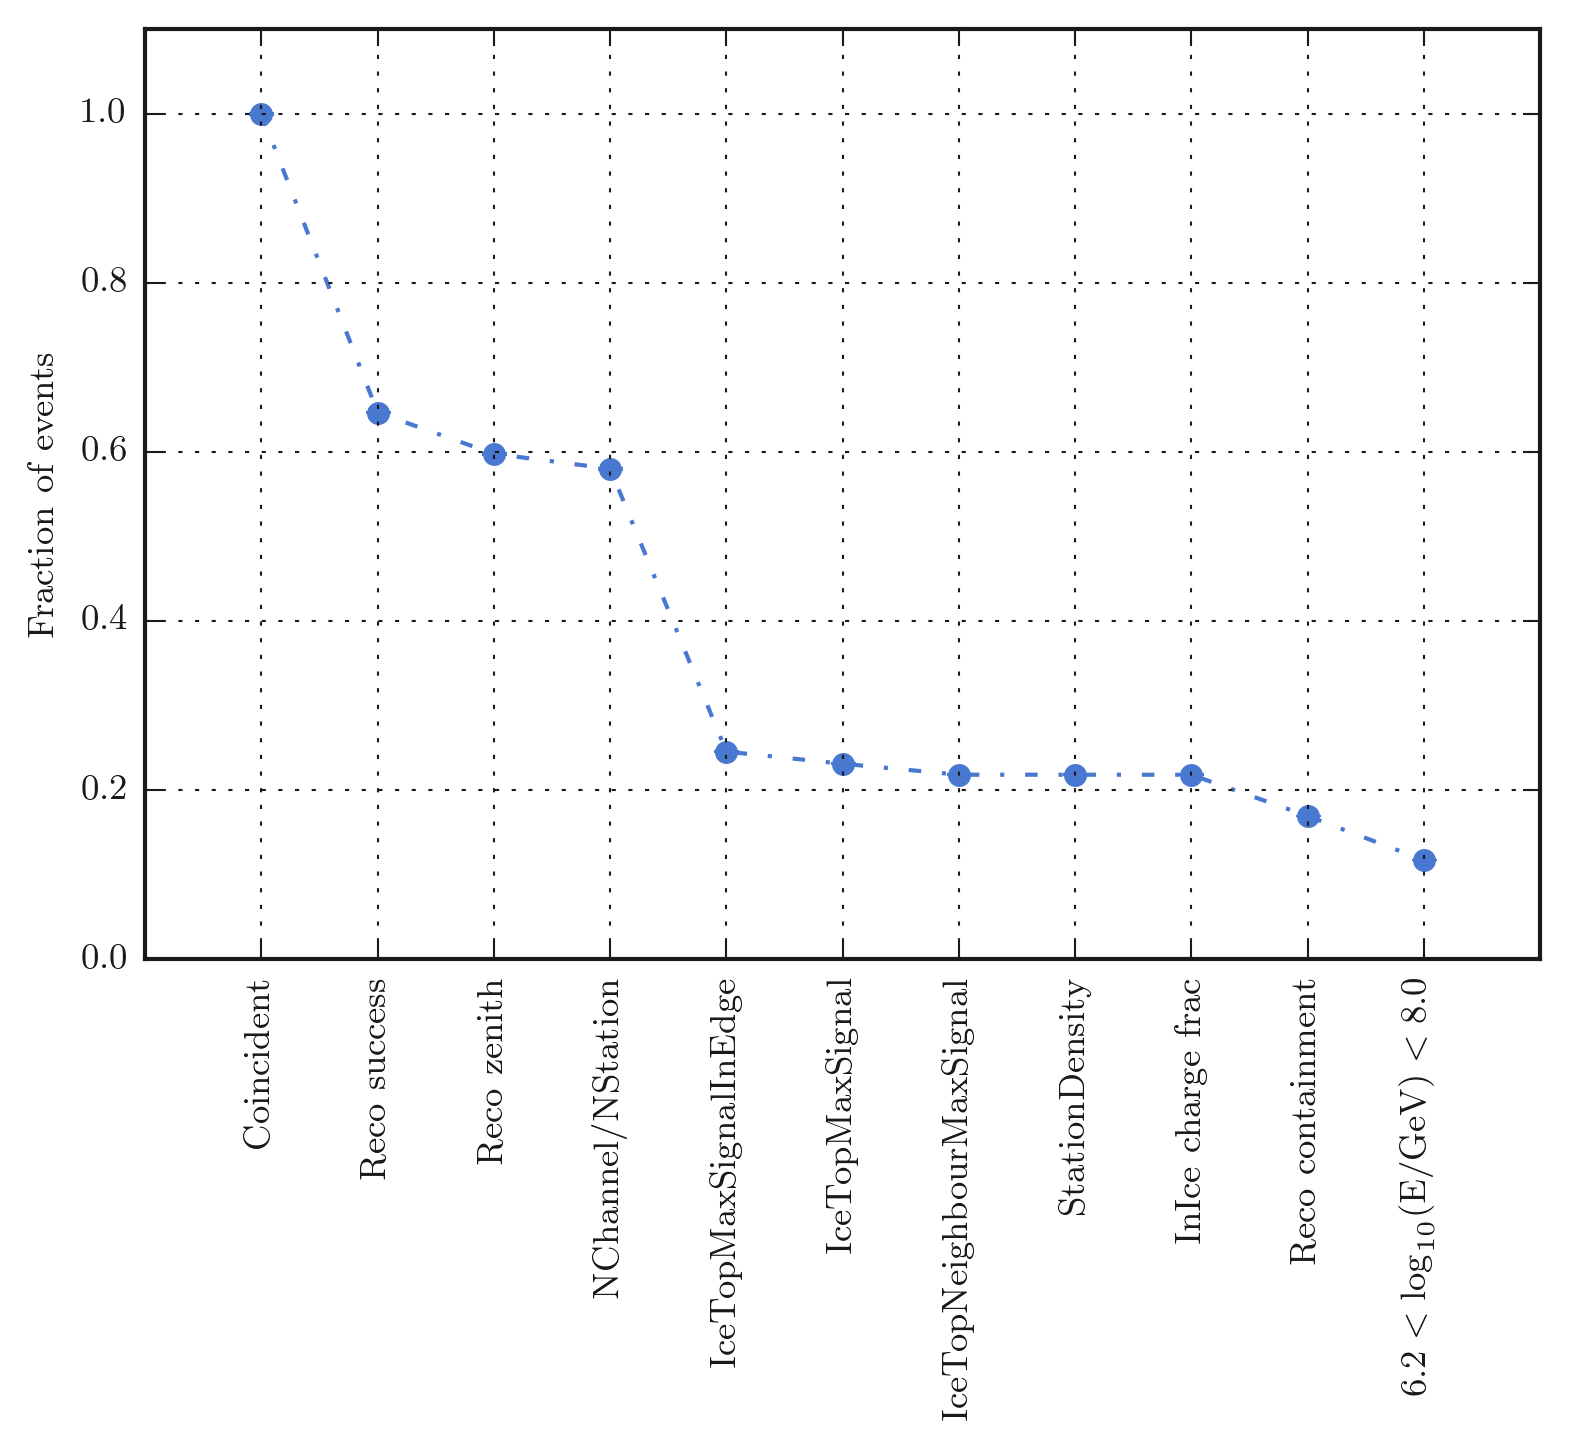

In [3]:
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IceTopMaxSignalInEdge',
                     'IceTopMaxSignal', 'IceTopNeighbourMaxSignal', 
                     'StationDensity', 'max_charge_frac', 'reco_containment', 'energy_range']
labels = ['Reco success', 'Reco zenith', 'NChannel/NStation', 'IceTopMaxSignalInEdge',
          'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
          'StationDensity', 'InIce charge frac', 'Reco containment', '$6.2 < \log_{10}(\mathrm{E/GeV}) < 8.0$']
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True]*len(df))
n_tot = len(df)
n_tot_err = np.sqrt(len(df))
initial, initial_err = data_functions.ratio_error(
        n_tot, n_tot_err,
        n_tot, n_tot_err)

event_flow = [initial]
event_flow_err = [initial_err]
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    ratio, ratio_err = data_functions.ratio_error(
        len(df_cuts), np.sqrt(len(df_cuts)),
        n_tot, n_tot_err)
    event_flow.append(ratio)
    event_flow_err.append(ratio_err)
#     event_flow.append(len(df_cuts)/n_tot)
#     event_flow_err.append(np.sqrt(len(df_cuts))/n_tot)
    
fig, ax = plt.subplots()
x = range(len(standard_cut_keys)+1)
print(x)
ax.errorbar(x, event_flow, yerr=event_flow_err,
           marker='.', linestyle='-.')
ax.grid()
# ax.set_ylim([1e-1,1e5])
# ax.set_yscale("log", nonposy='clip')
# ax.set_xlabel('True IT Containment Fraction')
plt.xticks(x, ['Coincident'] + labels, rotation='vertical')
ax.set_ylabel('Fraction of events')
ax.set_xlim([-1, len(x)])
ax.set_ylim([0, 1.1])